In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [18]:
def plot_graph(X, Y, X_hat=None, Y_hat=None, str_title=None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title is not None:
        plt.title(str_title, fontsize=20, pad=20)
        
    plt.plot(X, Y, ls='none', marker='o')
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
        
    plt.tick_params(axis='both', labelsize=14)

In [23]:
x_0 = tf.random.normal([20], 3, 1) #shape, mean, std
y_0 = tf.zeros(20)
x_1 = tf.random.normal([20], 5.5, 1)
y_1 = tf.ones(20)

x = tf.concat([x_0, x_1], 0)
y = tf.concat([y_0, y_1], 0)

print(x)
print(y)

tf.Tensor(
[3.611819  3.4919758 5.179533  3.8756375 2.356091  2.8096159 2.8802154
 1.6680648 4.893874  1.7074146 3.6219485 3.4323347 1.8443159 1.8465003
 3.8686295 3.3044791 3.2721012 2.3017523 1.9158354 1.4071784 4.3228216
 4.5967407 6.341961  5.4312906 4.538381  4.9846697 7.946146  6.8048525
 3.2995608 6.104592  4.935397  5.6028275 4.672351  5.9899297 6.2218027
 4.113632  6.331024  5.7741456 5.0736675 5.997121 ], shape=(40,), dtype=float32)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(40,), dtype=float32)


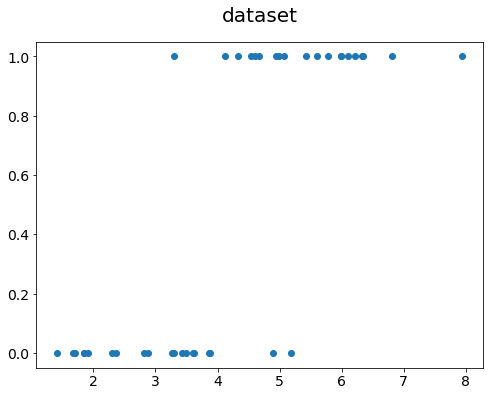

In [24]:
plot_graph(x, y, str_title='dataset')

In [25]:
W = tf.Variable(tf.random_normal_initializer(stddev=1)([1])) # [1] shape
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

def cross_entropy(y_pred, y_true):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.) # clip_by_value = log함수의 range 지정
    return -tf.reduce_sum(y_true*tf.math.log(y_pred) + (1-y_true)*(tf.math.log(1-y_pred)))

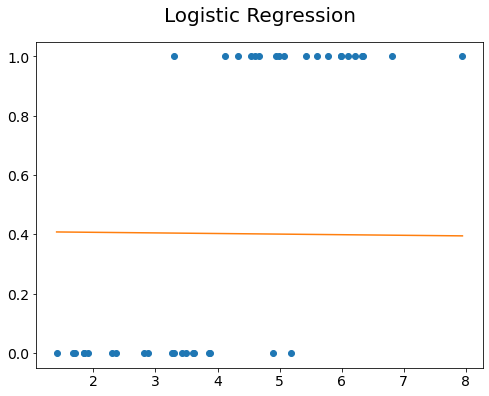

In [26]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, X_hat=x_fl, Y_hat=1/(1+tf.exp(-1*(W*x_fl+b))), str_title="Logistic Regression")

In [28]:
lr = 0.001
optimizer = tf.optimizers.SGD(lr) #Stochastic Gradient Descent # 전체가 아닌 데이터중 일부만 가져와서 GD

def run_optimization():
    with tf.GradientTape() as g:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        
    gradients = g.gradient(loss, [W,b])
    optimizer.apply_gradients(zip(gradients, [W,b]))
    
training_steps = 1000
display_step = 200

for step in range(training_steps):
    run_optimization()
    
    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        print("step :", step, ", loss: ", loss.numpy())

step : 0 , loss:  27.149055
step : 200 , loss:  21.065527
step : 400 , loss:  18.801325
step : 600 , loss:  17.267124
step : 800 , loss:  16.177898


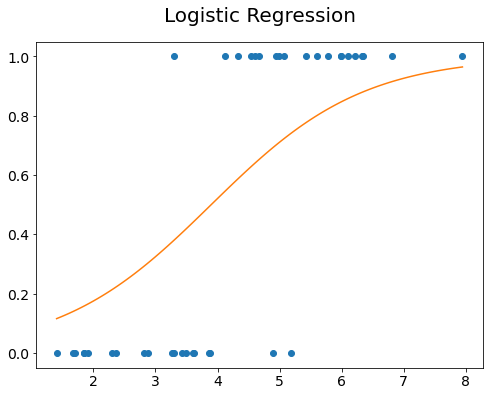

In [29]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, X_hat=x_fl, Y_hat=1/(1+tf.exp(-1*(W*x_fl+b))), str_title="Logistic Regression")

In [30]:
training_steps = 1000
display_step = 200

for step in range(training_steps):
    run_optimization()
    
    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        print("step :", step, ", loss: ", loss.numpy())

step : 0 , loss:  15.372935
step : 200 , loss:  14.758026
step : 400 , loss:  14.275393
step : 600 , loss:  13.888056
step : 800 , loss:  13.571406


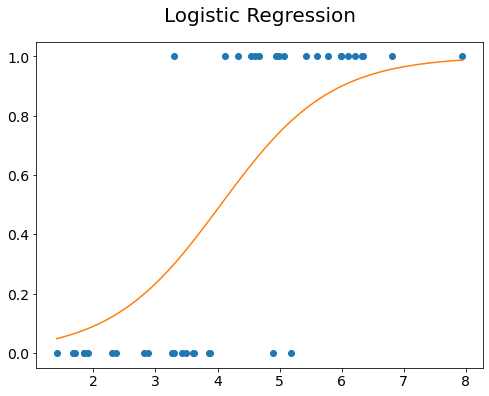

In [31]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, X_hat=x_fl, Y_hat=1/(1+tf.exp(-1*(W*x_fl+b))), str_title="Logistic Regression")

In [32]:
training_steps = 10000
display_step = 1000

for step in range(training_steps):
    run_optimization()
    
    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        print("step :", step, ", loss: ", loss.numpy())

step : 0 , loss:  13.308508
step : 1000 , loss:  12.475545
step : 2000 , loss:  12.047019
step : 3000 , loss:  11.796772
step : 4000 , loss:  11.638921
step : 5000 , loss:  11.534079
step : 6000 , loss:  11.46184
step : 7000 , loss:  11.410681
step : 8000 , loss:  11.373681
step : 9000 , loss:  11.346473


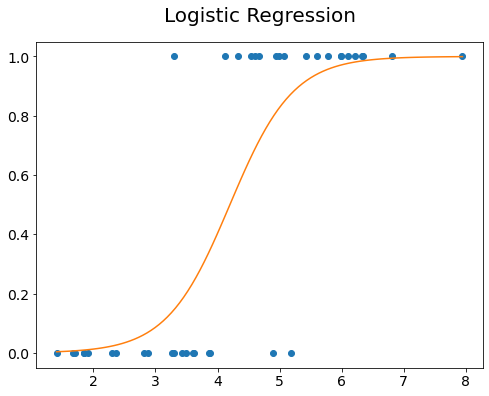

In [33]:
x_fl = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, X_hat=x_fl, Y_hat=1/(1+tf.exp(-1*(W*x_fl+b))), str_title="Logistic Regression")